<a href="https://colab.research.google.com/github/TonyJacb/Melonoma-Detector/blob/main/MedTechProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import cv2

from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/dataset.zip

## Set up data directory

In [ ]:
pwd

'/content'

In [ ]:
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                             horizontal_flip=True,
                             vertical_flip = True,
                             validation_split=0.25) 

train_generator = datagen.flow_from_directory("/content/train",
                                               target_size=(224, 224),
                                               batch_size=BATCH_SIZE,
                                               class_mode="binary",
                                               subset="training")

validation_generator = datagen.flow_from_directory("/content/test",
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="binary",
                                                    subset="validation")

Found 1978 images belonging to 2 classes.
Found 165 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'benign': 0, 'malignant': 1}

In [ ]:
print("There are {} training images and {} validation images. Each image is of shape {}.".format(train_generator.samples,
                                                                                                 validation_generator.samples,
                                                                                                 train_generator.image_shape))

There are 1978 training images and 165 validation images. Each image is of shape (224, 224, 3).


## Model Architecture

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input, Dropout
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from keras import metrics

model = tf.keras.Sequential([
                    Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224, 3)),
                    Conv2D(32, (3, 3), activation="relu"),
                    MaxPooling2D(2, 2),
                    Dropout(rate = 0.3),

                    Conv2D(64, (3, 3), activation="relu"),
                    MaxPooling2D(2, 2),
                    Dropout(rate = 0.4),

                    Conv2D(64, (3, 3), activation="relu"),
                    MaxPooling2D(2, 2),

                    Flatten(),
                    Dense(128, activation="relu"),
                    Dense(1, activation="sigmoid")
                            ])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)       

## Train

In [ ]:
import scipy


history1 = model.fit(train_generator,
                     epochs=20,
                     steps_per_epoch=train_generator.samples//BATCH_SIZE,
                     validation_data=validation_generator,
                     validation_steps=validation_generator.samples//BATCH_SIZE,
                     )

Epoch 1/20
61/61 [==============================] - 43s 191ms/step - loss: 1.0917 - accuracy: 0.5334 - val_loss: 0.5777 - val_accuracy: 0.6625
Epoch 2/20
61/61 [==============================] - 10s 157ms/step - loss: 0.5289 - accuracy: 0.7296 - val_loss: 0.6081 - val_accuracy: 0.5938
Epoch 3/20
61/61 [==============================] - 10s 156ms/step - loss: 0.4466 - accuracy: 0.7866 - val_loss: 0.5173 - val_accuracy: 0.7812
Epoch 4/20
61/61 [==============================] - 10s 156ms/step - loss: 0.4418 - accuracy: 0.7770 - val_loss: 0.5251 - val_accuracy: 0.7437
Epoch 5/20
61/61 [==============================] - 10s 155ms/step - loss: 0.3905 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.7563
Epoch 6/20
61/61 [==============================] - 10s 155ms/step - loss: 0.3805 - accuracy: 0.8082 - val_loss: 0.4913 - val_accuracy: 0.7625
Epoch 7/20
61/61 [==============================] - 10s 155ms/step - loss: 0.3774 - accuracy: 0.8141 - val_loss: 0.5026 - val_accuracy: 0.7437

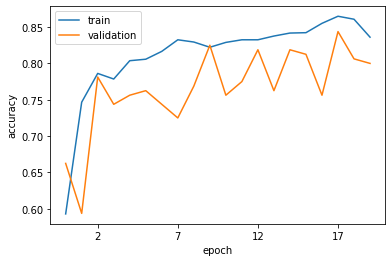

In [ ]:
plt.figure()
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(2, 20, 5))
plt.legend(['train', 'validation'])

In [ ]:
score = model.evaluate(validation_generator, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.42953187227249146 / Test accuracy: 0.8060606122016907


In [ ]:
tf.keras.models.save_model(model,filepath = "/content/gdrive/My Drive/MedTech",include_optimizer=True)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/MedTech/assets


In [ ]:
model = tf.keras.models.load_model( "/content/gdrive/My Drive/MedTech" )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)       

In [ ]:
model = tf.saved_model.load("/content/gdrive/My Drive/MedTech")
concrete_func = model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

concrete_func.inputs[0].set_shape([1, 224, 224, 3])
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

In [ ]:
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

## Benign Loop

In [ ]:
def img_preprocess(img):
  img = cv2.resize(img,(224,224))
  return img

##Gather images in benign
benign = []
PATH = "/content/test/benign"
for file in os.listdir(PATH):
  if file.endswith(".jpg") or file.endswith(".JPG") or file.endswith(".jpeg") or file.endswith("png"):
    img = cv2.imread(os.path.join(PATH,file))
    #CV2 reads BGR, Matplotlib reads RBG
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img_preprocess(img)
    img.astype("float32")
    benign.append(img/255)
benign = np.asarray(benign)

In [ ]:
benign.shape

(360, 224, 224, 3)

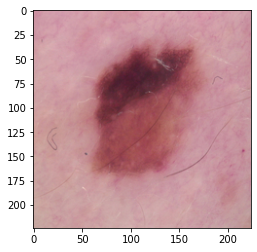

In [ ]:
import random
plt.imshow(benign[random.randint(0,360)])

## Malignant loop

In [ ]:
malignant = []
PATH = "/content/test/malignant/"
for file in os.listdir(PATH):
  if file.endswith(".jpg") or file.endswith(".JPG") or file.endswith(".jpeg") or file.endswith("png"):
    img = cv2.imread(os.path.join(PATH,file))
    #CV2 reads BGR, Matplotlib reads RBG
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img_preprocess(img)
    img.astype("float32")
    malignant.append(img/255)
malignant = np.asarray(malignant)

In [ ]:
malignant.shape

(300, 224, 224, 3)

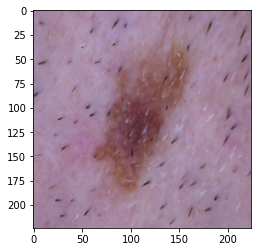

In [ ]:
import random
plt.imshow(malignant[random.randint(0,300)])

## Prediction

### 0 is benign, 1 is malignant

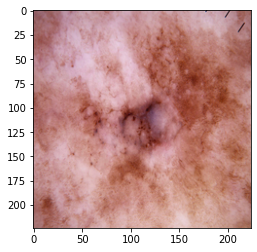

In [ ]:
index = 2

#take image from malignant or benign array
plt.imshow(malignant[index])

#model predicts what the image is
sample_test_img = np.expand_dims(malignant[index], axis=0)
predicted_label = np.squeeze(model.predict(sample_test_img))

#Array to list then rounding off the float32 value
predicted_label = round(np.ndarray.tolist(predicted_label))

In [ ]:
predicted_label

1

In [ ]:
if(predicted_label==0):
    print("Benign")
else:
    print("Malignant")

Malignant


## Prediction list

In [ ]:
benignPred_list = []
malignantPred_list = []
for i in range(360):
    benignPred_list.append(0)
for i in range(300):
    malignantPred_list.append(1)

In [ ]:
len(malignantPred_list)

300

In [ ]:
actual = benignPred_list + malignantPred_list

In [ ]:
benignPred_model = []
for i in range(360):
    sample_test_img = np.expand_dims(benign[i], axis=0)
    predicted_label = np.squeeze(model.predict(sample_test_img))

    #Array to list then rounding off the float32 value
    predicted_label = round(np.ndarray.tolist(predicted_label))
    benignPred_model.append(predicted_label)

In [ ]:
maliPred_model =[]
for i in range(300):
    sample_test_img = np.expand_dims(malignant[i], axis=0)
    predicted_label = np.squeeze(model.predict(sample_test_img))

    #Array to list then rounding off the float32 value
    predicted_label = round(np.ndarray.tolist(predicted_label))
    maliPred_model.append(predicted_label)

In [ ]:
predictionList = benignPred_model+maliPred_model

In [ ]:
len(predictionList)

660

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat  = confusion_matrix(actual,predictionList)

In [ ]:
conf_mat

array([[273,  87],
       [ 25, 275]])

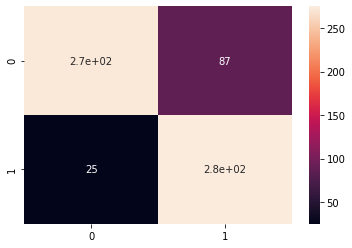

In [ ]:
import seaborn as sns
sns.heatmap(conf_mat, annot=True)

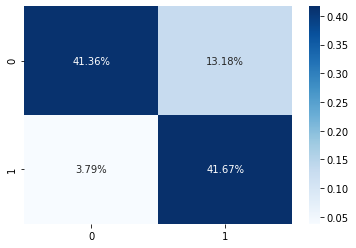

In [ ]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
##https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

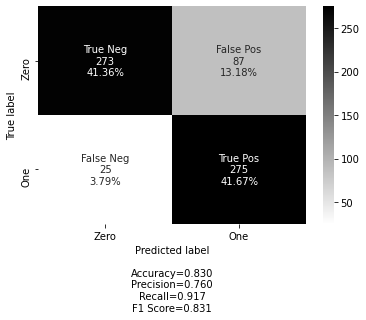

In [ ]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["Zero", "One"]
make_confusion_matrix(conf_mat, 
                      group_names=labels,
                      categories=categories, 
                      cmap="binary")

### False Positive is Type 1 Error
### False Negative is Type 2 Error

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("best-yet") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

OSError: ignored

### Confusion Matrix Stats

In [ ]:
sensitivity = 233/(233+46)
specificity = 314/(314+67)

In [ ]:
sensitivity

In [ ]:
specificity